<a href="https://colab.research.google.com/github/jsdhami/Lightning-Research-Data/blob/main/Lightning(MR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

lightning_data=pd.read_csv("https://raw.githubusercontent.com/jsdhami/Lightning-Research-Data/main/Data/MP/lightning_data.csv")
lightning_data.head(100)

,Flash time (UTC),Lat,Lon,Radiance,Milliseconds,Groups,Events,Orbit-ID
0,2023-075T21:09:50.3721Z [Mar,27.490,84.669,664386,606,21,43,200952
1,2023-075T21:09:53.4584Z [Mar,27.481,84.570,13610,0,1,2,200952
2,2023-075T21:09:56.8056Z [Mar,27.451,84.592,20100,9,2,4,200952
3,2023-075T21:10:02.0406Z [Mar,27.193,85.219,91748,290,8,12,200952
4,2023-075T21:10:02.4973Z [Mar,27.414,84.609,5025,0,1,1,200952
...,...,...,...,...,...,...,...,...
95,2023-137T12:09:31.2843Z [May,27.176,85.297,237421,381,9,32,113728
96,2023-137T12:09:31.4527Z [May,27.520,84.597,265883,372,12,36,113728
97,2023-137T12:09:31.6713Z [May,27.184,85.105,125870,21,2,10,113728
98,2023-137T12:09:31.9165Z [May,27.305,84.954,68352,113,6,11,113728


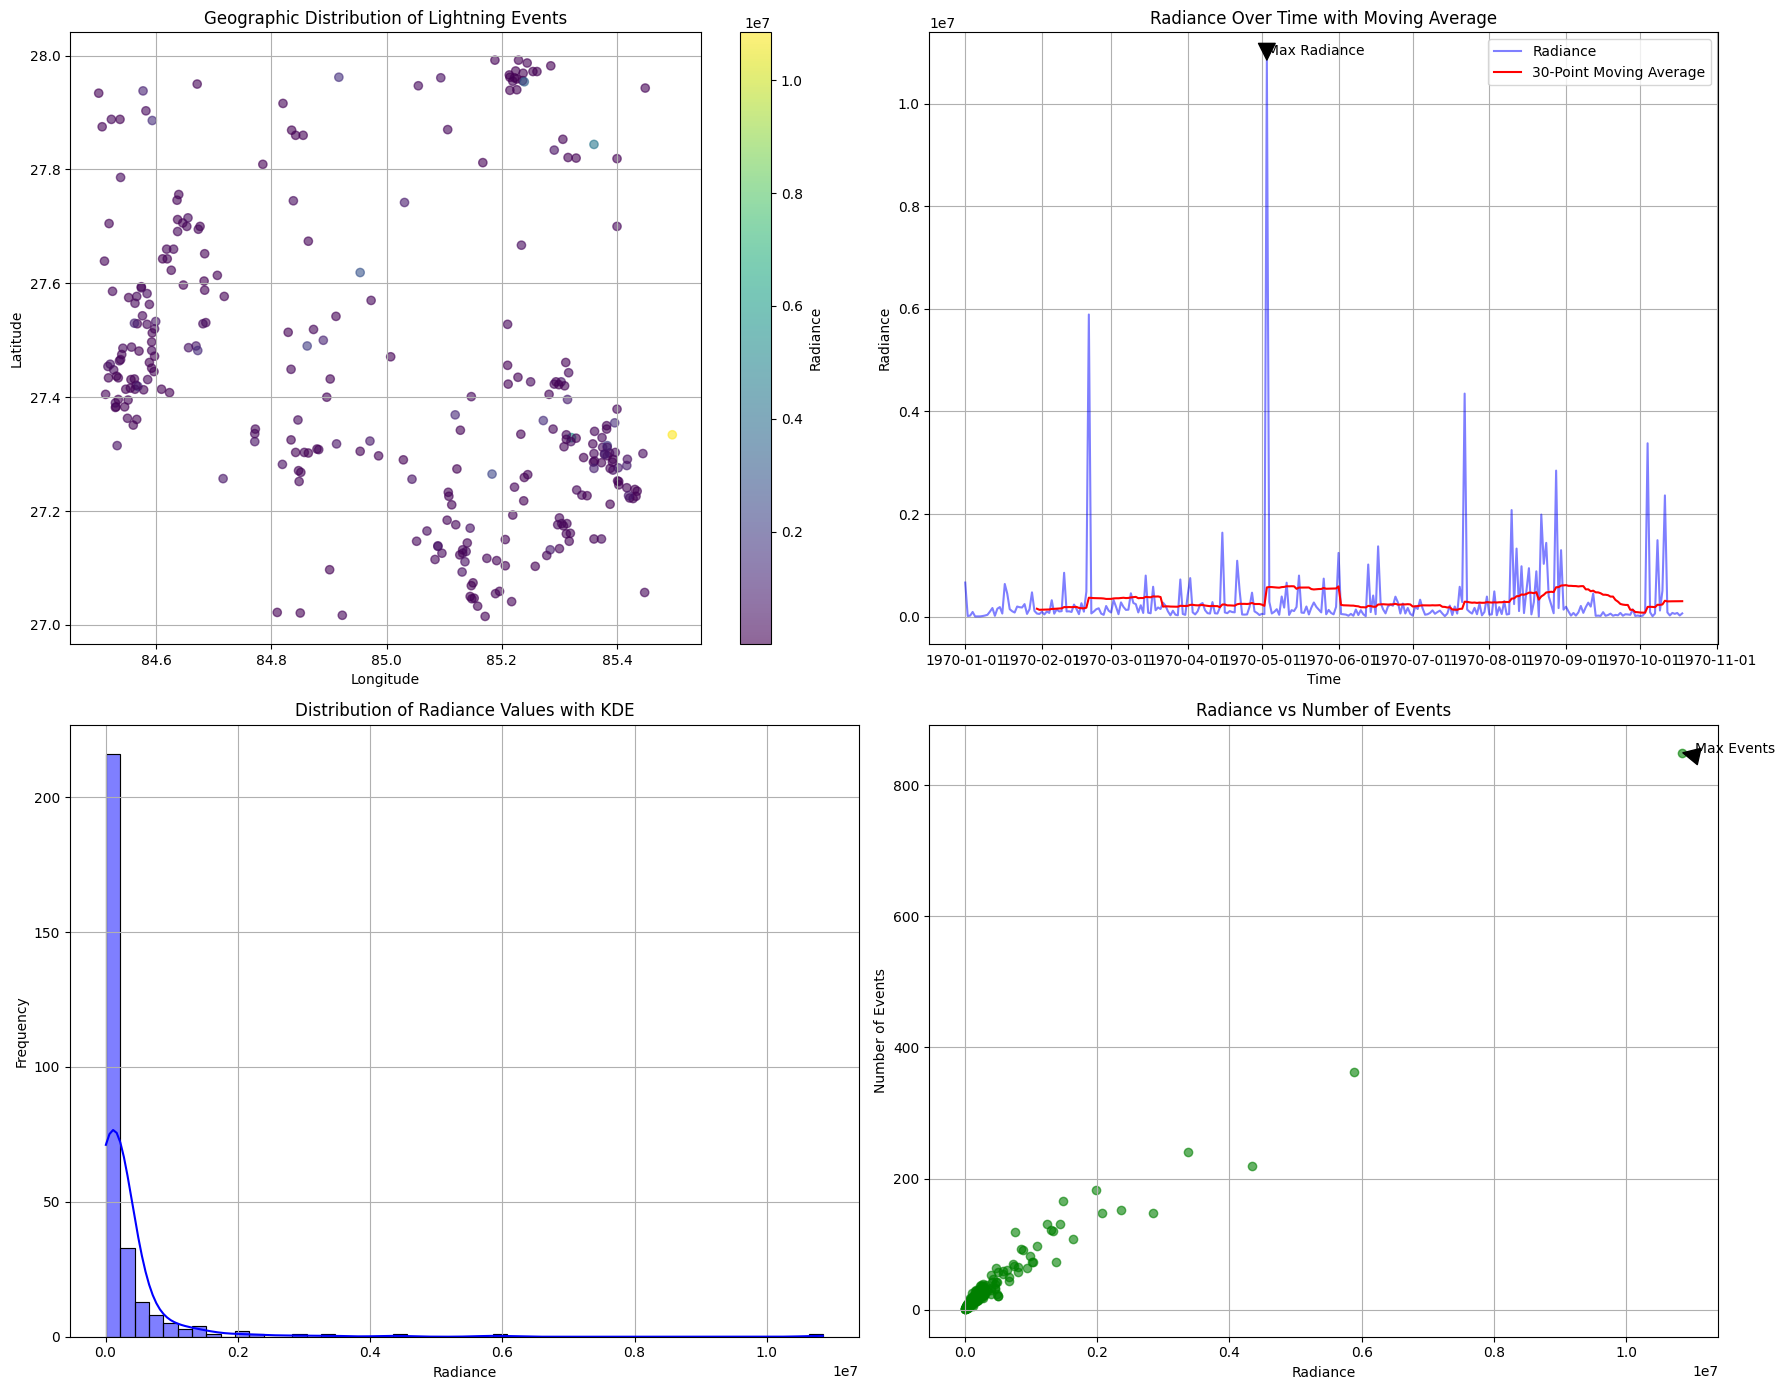

In [63]:

#figure and axes
fig, axs = plt.subplots(2, 2, figsize=(18, 14))

# Scatter plot of Latitude vs Longitude with Radiance as color
sc = axs[0, 0].scatter(lightning_data['Lon'], lightning_data['Lat'], c=lightning_data['Radiance'], cmap='viridis', alpha=0.6)
cbar = fig.colorbar(sc, ax=axs[0, 0], label='Radiance')
axs[0, 0].set_xlabel('Longitude')
axs[0, 0].set_ylabel('Latitude')
axs[0, 0].set_title('Geographic Distribution of Lightning Events')
axs[0, 0].grid(True)

# Time series plot of Radiance with Moving Average color
axs[0, 1].plot(lightning_data['Flash time (UTC)'], lightning_data['Radiance'], color='blue', alpha=0.5, label='Radiance')
axs[0, 1].plot(lightning_data['Flash time (UTC)'], lightning_data['Radiance'].rolling(window=30).mean(), color='red', label='30-Point Moving Average')
axs[0, 1].set_xlabel('Time')
axs[0, 1].set_ylabel('Radiance')
axs[0, 1].set_title('Radiance Over Time with Moving Average')
axs[0, 1].legend()
axs[0, 1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
axs[0, 1].xaxis.set_major_locator(mdates.MonthLocator())
axs[0, 1].grid(True)

# Adding notation to the time series plot
max_radiance_time = lightning_data.loc[lightning_data['Radiance'].idxmax(), 'Flash time (UTC)']
max_radiance_value = lightning_data['Radiance'].max()
axs[0, 1].annotate('Max Radiance',
                   xy=(max_radiance_time, max_radiance_value),
                   xytext=(max_radiance_time, max_radiance_value + 100000),
                   arrowprops=dict(facecolor='black', shrink=0.05),
                   fontsize=10, color='black')

# Histogram of Radiance with KDE(kernel Density Estimation)
sns.histplot(lightning_data['Radiance'], bins=50, kde=True, color='blue', ax=axs[1, 0])
axs[1, 0].set_xlabel('Radiance')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].set_title('Distribution of Radiance Values with KDE')
axs[1, 0].grid(True)

# Scatter plot of Radiance vs Number of Events
axs[1, 1].scatter(lightning_data['Radiance'], lightning_data['Events'], alpha=0.6, color='green')
axs[1, 1].set_xlabel('Radiance')
axs[1, 1].set_ylabel('Number of Events')
axs[1, 1].set_title('Radiance vs Number of Events')
axs[1, 1].grid(True)

# Adding notation to the scatter plot of Radiance vs Number of Events
max_events_radiance = lightning_data.loc[lightning_data['Events'].idxmax(), 'Radiance']
max_events_value = lightning_data['Events'].max()
axs[1, 1].annotate('Max Events',
                   xy=(max_events_radiance, max_events_value),
                   xytext=(max_events_radiance + 200000, max_events_value),
                   arrowprops=dict(facecolor='black', shrink=0.05),
                   fontsize=10, color='black')

plt.tight_layout()
plt.show()

##**Key Points:**##
##**Seaborn**##
 This library simplifies the process of adding KDE to histograms with the histplot function.
##**KDE:**##
The **kde=True** parameter in sns.histplot adds the Kernel Density Estimate to the histogram, showing the density of the distribution.